In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('US_Accidents_Dec19.csv')

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
df = df.set_index('ID')

## Data Cleaning

In [4]:
df1 = df.copy()

1. Column 'Country' consists one value — US and Turning_Loop contains one value — False so this column can be dropped

In [5]:
df1.Turning_Loop.unique()
df1.Country.unique()

array([False])

array(['US'], dtype=object)

In [6]:
df1.drop(columns = ['Country','Turning_Loop'], inplace = True)

2. Column 'End_Lat' and 'End_Lng'are not needed as 'Distance' effected is mentioned, so we can drop these two columns. Also, 'Source' that depicts the API used to collect accident updates is not our look out here, so that column can be dropped as well.

In [7]:
df1.drop(columns= ['Source', 'End_Lat', 'End_Lng'], inplace = True)

3. Let's plot TMC to see how its impacting the data. 

Traffic Message Channel (TMC) is a technology for delivering traffic and travel information to motor vehicle drivers. It is digitally coded using the ALERT C or TPEG protocol into RDS Type 8A groups carried via conventional FM radio broadcasts.

In [8]:
df1.TMC.value_counts().nlargest(10)

201.0    1890037
241.0     219071
245.0      35919
229.0      22653
203.0      16792
222.0      12552
244.0      11163
406.0       9467
246.0       6350
202.0       6047
Name: TMC, dtype: int64

In [10]:
sns.set(rc={'figure.figsize':(16,10)})

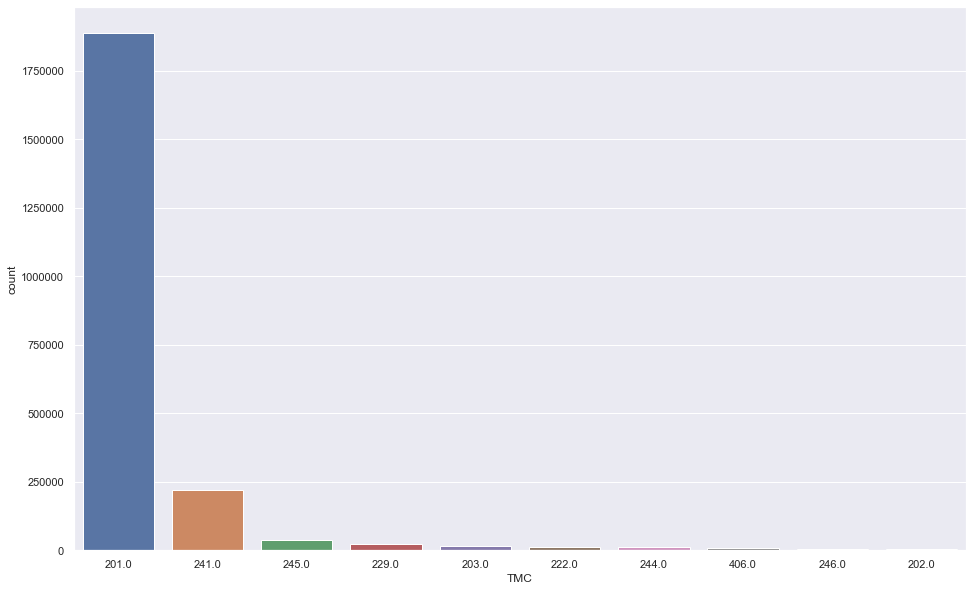

In [11]:
sns.countplot(x = 'TMC', data = df1, order = pd.value_counts(df1['TMC']).iloc[:10].index) #plotting top 10 values

TMC of the top two codes 201 and 241 depict, 201 = 'Why not ride share?' and 241 = 'In roadworks area'

In [9]:
df1.drop(columns = ['TMC'], inplace = True)

4. Plotting accidents in various Timezones

There are nine standard time zones in the US. We can see only four timezones present in the dataset.

In [10]:
df1.Timezone.value_counts()

US/Eastern     1277187
US/Pacific      805117
US/Central      727147
US/Mountain     161721
Name: Timezone, dtype: int64

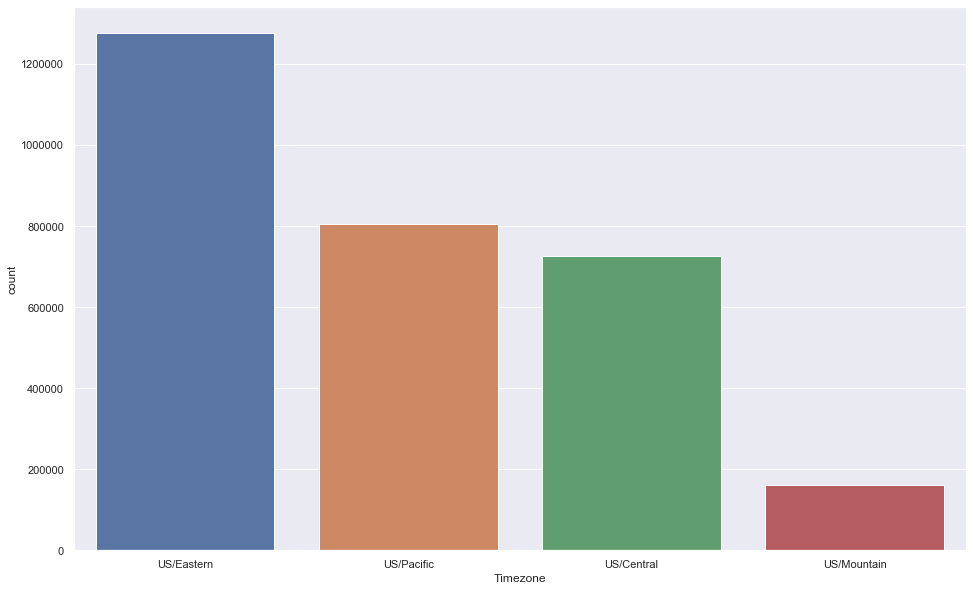

In [14]:
sns.countplot(x = 'Timezone', data = df1)

Most numbers of accidents took place in regions with timezone: Eastern Standard Time followed by Pacific Standard Time.

5. The columns 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight' lack to make sense in our analysis and therefore they can be dropped.

In [11]:
df1.drop(columns = ['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], inplace = True)

6. The column 'Weather_Timestamp' can be dropped as we will be working with Start_Time and End_Time.

In [12]:
df1.drop(columns = ['Weather_Timestamp','Airport_Code'], inplace = True)

7. Rename column 'Number' to 'Street_No' and 'Street' to 'Street_Name'

In [13]:
df1.rename(columns = {'Number':'Street_No', 'Street':'Street_Name'}, inplace = True)

In [14]:
df1.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street_No,Street_Name,Side,City,County,State,Zipcode,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US/Eastern,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night
A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night
A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US/Eastern,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Night
A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US/Eastern,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night
A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US/Eastern,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day


8. Lets analyze the columns that have Null values.

In [15]:
df1.isna().sum()

Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
Distance(mi)               0
Description                1
Street_No            1917605
Street_Name                0
Side                       0
City                      83
County                     0
State                      0
Zipcode                  880
Timezone                3163
Temperature(F)         56063
Wind_Chill(F)        1852623
Humidity(%)            59173
Pressure(in)           48142
Visibility(mi)         65691
Wind_Direction         45101
Wind_Speed(mph)       440840
Precipitation(in)    1998358
Weather_Condition      65932
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calmin

In [16]:
df1.Street_No.fillna('Unknown', inplace = True) #fill unknown to blanl Street Numbers

In [17]:
df1.Description.fillna('Unknown',inplace = True)

In [18]:
df1[(df1.City.isna())].Zipcode.isna().sum() #no records where both city and zipcode are not mentioned

0

In [19]:
df1.City.fillna('Unknown',inplace = True) #we know the other address (zipcode and streetcode) fields for these records

Lets find location that have null zipcode and have city, street name, street no and description not updated. These are the locations which we cant locate and so need to be removed from the dataset.

In [20]:
df1[(df1.Zipcode.isna()) & (df1.City == 'Unknown') & (df1.Description == 'Unknown') & \
    (df1.Street_No == 'Unknown') & (df1.Street_Name == 'Unknown')].size

0

In [21]:
df1[(df1.Zipcode.isna()) & (df1.Description != 'Unknown')]

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street_No,Street_Name,Side,City,County,State,Zipcode,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A-7795,2,2016-12-19 21:50:18,2016-12-19 22:20:02,37.885376,-122.516586,0.010,#1 lane blocked due to accident on US-101 Nort...,Unknown,US-101 N,R,Southeast Marin,Marin,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,Night
A-13890,2,2016-10-27 18:35:03,2016-10-27 19:04:40,37.885376,-122.516586,0.010,#2 lane blocked due to accident on US-101 Nort...,Unknown,US-101 N,R,Southeast Marin,Marin,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,Night
A-14516,2,2016-11-01 20:55:51,2016-11-01 21:25:29,37.885376,-122.516586,0.010,#2 lane blocked due to accident on US-101 Nort...,Unknown,US-101 N,R,Southeast Marin,Marin,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,Night
A-16209,2,2016-11-10 16:14:07,2016-11-10 16:43:44,37.885376,-122.516586,0.010,Right hand shoulder blocked due to accident on...,Unknown,US-101 N,R,Southeast Marin,Marin,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,Day
A-23540,2,2016-10-07 09:21:49,2016-10-07 09:50:47,37.505482,-122.119301,0.000,Lane blocked due to accident on CA-84 Westboun...,Unknown,Dumbarton Bridge,R,San Mateo,San Mateo,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A-2968040,4,2019-08-10 13:56:29,2019-08-10 14:25:34,38.991890,-76.371090,1.273,Closed at Chesapeake Bay Brg - Road closed due...,Unknown,William Preston Lane Jr Memorial Brg,R,District 4 Kent Island,Queen Anne's,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,Day
A-2969697,2,2019-08-15 05:03:33,2019-08-15 05:32:37,44.239460,-71.256087,0.127,At US-302/Crawford Notch Rd - Accident.,95,White Mountain Rd,L,Pinkhams,Coos,NH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,Night
A-2970019,2,2019-08-15 02:28:00,2019-08-15 05:27:00,39.831696,-110.966258,0.979,At Beaver Creek Rd - Accident.,Unknown,US-6 E,R,Springville-Mapleton,Utah,UT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,Night


In [22]:
df1.Zipcode.fillna('Unknown', inplace = True)

9. Lets create a new column for Duration to indicate the duration to clear the accident

In [23]:
df1['Start_Time'] = pd.to_datetime(df.Start_Time)
df1['End_Time'] = pd.to_datetime(df.End_Time)
df1['Duration'] = (df1.End_Time - df1.Start_Time).astype('timedelta64[m]')

In [24]:
df1.Duration.value_counts()

29.0        1064621
44.0         395097
360.0        368582
59.0         201998
30.0          85921
             ...   
2958.0            1
757487.0          1
2968.0            1
2970.0            1
3385.0            1
Name: Duration, Length: 2126, dtype: int64

## Data Analysis

In [31]:
df1.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Duration
count,2.974335e+06,2.974335e+06,2.974335e+06,2.974335e+06,2.918272e+06,1.121712e+06,2.915162e+06,2.926193e+06,2.908644e+06,2.533495e+06,975977.000000,2.974335e+06
mean,2.360190e+00,3.649361e+01,-9.542625e+01,2.855654e-01,6.235120e+01,5.132685e+01,6.540542e+01,2.983190e+01,9.150770e+00,8.298064e+00,0.020495,1.205396e+02
std,5.414733e-01,4.918849e+00,1.721881e+01,1.548392e+00,1.878855e+01,2.519127e+01,2.255676e+01,7.213808e-01,2.892114e+00,5.138546e+00,0.235770,3.678437e+03
min,1.000000e+00,2.455527e+01,-1.246238e+02,0.000000e+00,-7.780000e+01,-6.590000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-3.500000e+01
25%,2.000000e+00,3.355040e+01,-1.172920e+02,0.000000e+00,5.000000e+01,3.200000e+01,4.900000e+01,2.982000e+01,1.000000e+01,4.600000e+00,0.000000,2.900000e+01
50%,2.000000e+00,3.584969e+01,-9.025083e+01,0.000000e+00,6.440000e+01,5.400000e+01,6.700000e+01,2.998000e+01,1.000000e+01,7.000000e+00,0.000000,4.400000e+01
75%,3.000000e+00,4.037026e+01,-8.091891e+01,1.000000e-02,7.600000e+01,7.300000e+01,8.400000e+01,3.011000e+01,1.000000e+01,1.040000e+01,0.000000,7.400000e+01
max,4.000000e+00,4.900220e+01,-6.711317e+01,3.336300e+02,1.706000e+02,1.150000e+02,1.000000e+02,3.304000e+01,1.400000e+02,8.228000e+02,25.000000,1.786320e+06


# Analysing data to get the key facts from the data-set to know about the basic trends
## 1. Deep drilling the data based on location an impact (Duration, Distance & Severity)

Lets plot top Timezones, top states and top cities

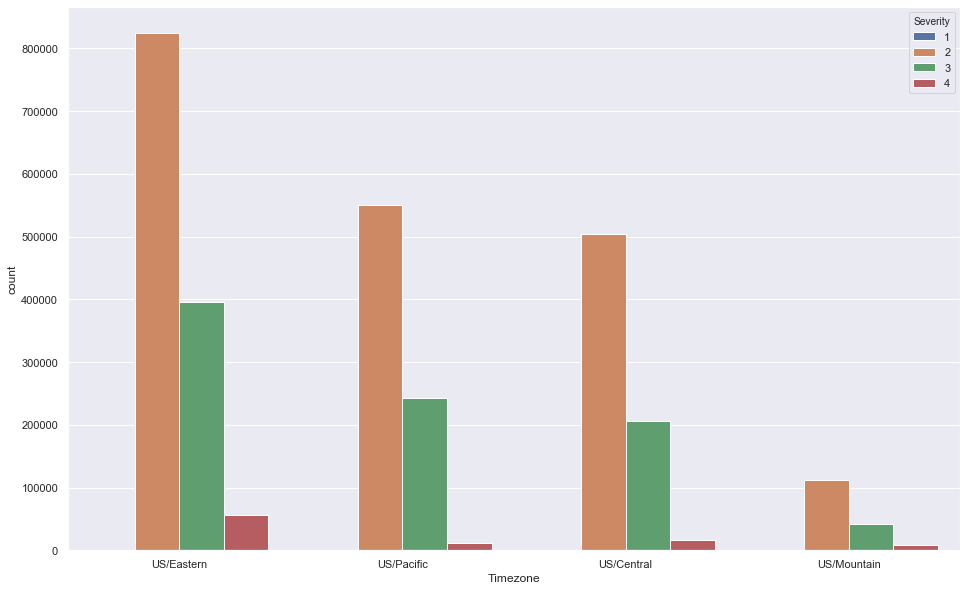

In [128]:
sns.countplot(x = 'Timezone', hue = 'Severity', data = df1)

In [32]:
df2 = df1[(df1.Timezone != 'US/Mountain')]

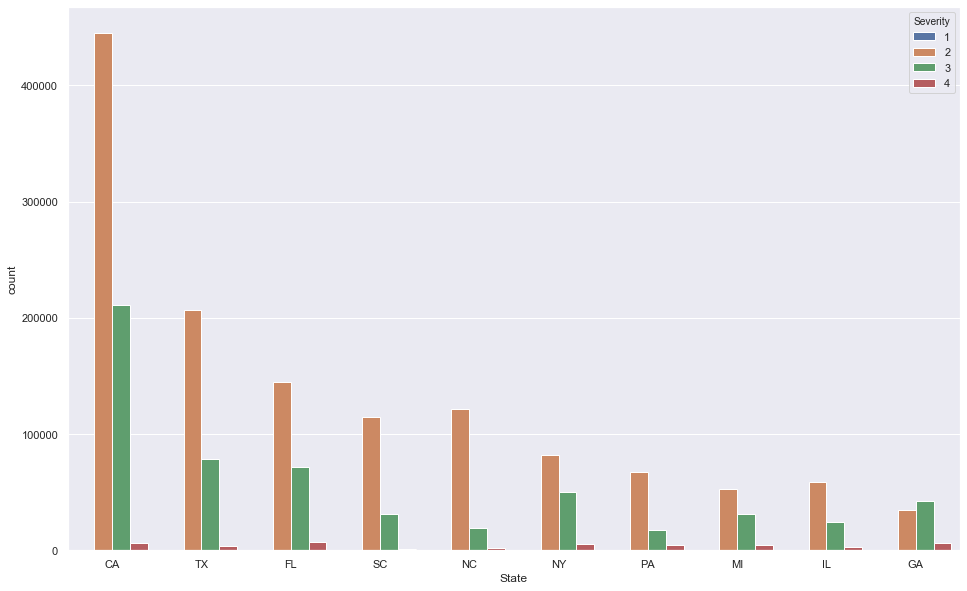

In [33]:
sns.countplot(x = 'State', hue = 'Severity', data = df2, order = \
              pd.value_counts(df2['State']).iloc[:10].index) #plotting top 10 values

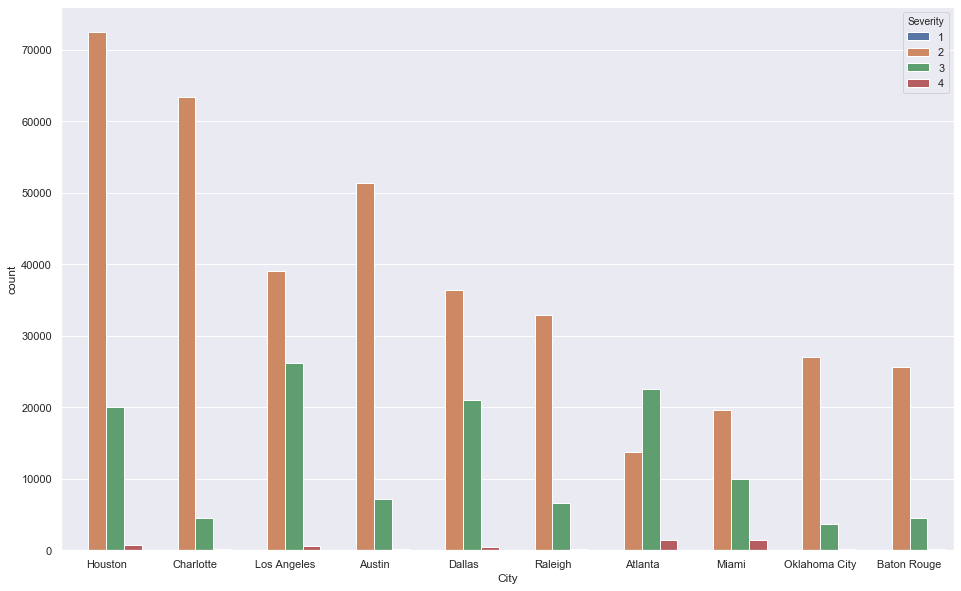

In [34]:
sns.countplot(x = 'City', hue = 'Severity', data = df2, order = \
              pd.value_counts(df2['City']).iloc[:10].index) #plotting top 10 values

Number of accidents in California is almost twice the number of accidents in Texas. But Houston, Texas still has the mximum number of accidents

We analyse the top cities to get more interesting results

In [35]:
df2_Top10 = df2[(df2.City == 'Houston') | (df2.City == 'Charlotte') |(df2.City == 'Los Angeles') |\
                (df2.City == 'Austin') |(df2.City == 'Dallas') | (df2.City == 'Raleigh') | \
            (df2.City == 'Atlanta') | (df2.City == 'Miami')|(df2.City == 'Oklahoma') | (df2.City == 'Baton Rouge')]

In [36]:
df2_Top10.Street_Name.value_counts().iloc[0:10] #Top 10 streets in top 10 cities with maximum accidents

I-10 W                5977
I-10 E                4672
I-95 S                4287
I-95 N                4273
I-45 N                3964
I-405 N               3203
I-75 S                2984
I-45 S                2898
Golden State Fwy S    2796
I-635 W               2713
Name: Street_Name, dtype: int64

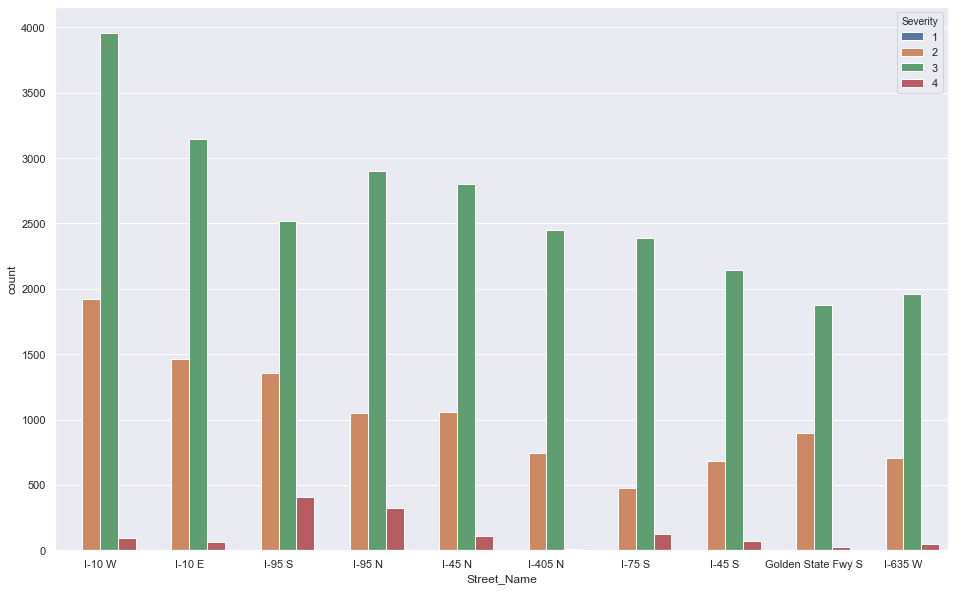

In [37]:
sns.countplot(x = 'Street_Name', hue = 'Severity', data = df2_Top10, order = \
              pd.value_counts(df2_Top10['Street_Name']).iloc[:10].index)

Most accidents (approx 80%) taking place in top 10 streets of top 10 cities occur on highway and can involve fatalities (Severity 3)

To support our finding and now more about the impact of these accidents based on Duration and Distance

Lets find out if distance effected was due to queue of traffic or due to accident impact and how severity is related

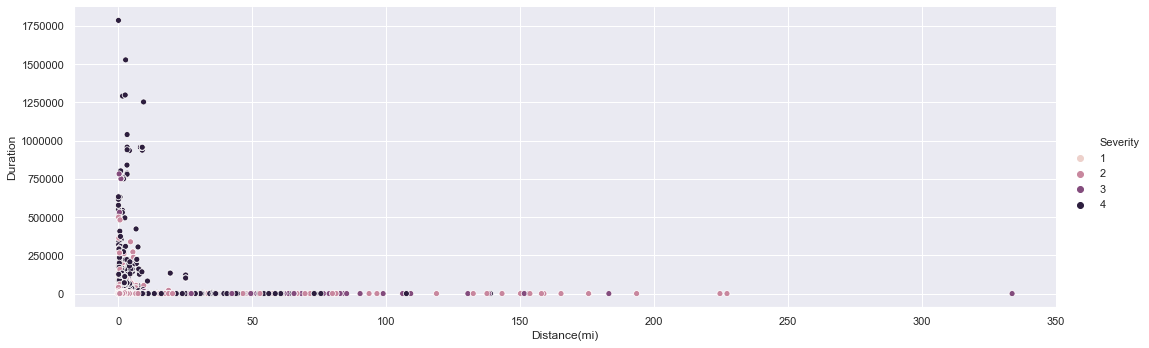

In [38]:
sns.relplot(x = 'Distance(mi)', y = 'Duration', hue = 'Severity', data = df2, aspect = 3) 
#severity 3 accidents show higher distance but smaller duration
#severity 4 accidents show low distance and higher duration #not proporationally related

In [39]:
df2['Distance(mi)'].value_counts().nlargest(10) #max num of has minimal distance of road effected
df2_MaxDis = df2.sort_values(by = ['Distance(mi)'], ascending = False).iloc[0:20] #longer length of road effected

0.000    1890477
0.010     250584
0.010      13343
0.020       5950
0.001       5022
0.002       2543
0.003       1779
0.004       1455
0.011       1346
0.008       1285
Name: Distance(mi), dtype: int64

In [40]:
df2_MaxDis[['Severity','Distance(mi)','Duration', 'Street_Name','City', 'State']]

,Severity,Distance(mi),Duration,Street_Name,City,State
ID,,,,,,
A-1474143,3,333.630005,29.0,I-95 N,Walterboro,SC
A-2084894,2,227.210007,46.0,El Camino Real N,Pismo Beach,CA
A-1759156,2,224.589996,28.0,US-30 E,Ames,IA
A-1428557,2,193.479996,69.0,Austin Hwy,Fallon,NV
A-681707,3,183.119995,28.0,I-26 W,Columbia,SC
A-726647,2,175.679993,107.0,NV-318,Hiko,NV
A-862751,2,175.539993,94.0,NV-318,Lund,NV
A-1070365,2,165.259995,81.0,Ice Mine Rd,Coudersport,PA
A-1506779,2,158.880005,27.0,US Highway 59,Garvin,MN


## 2. Factors effecting accidents - Infrastructure
### Columns: 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal'

In [41]:
df2 = pd.get_dummies(df1, columns = ['Severity'])

In [50]:
df2.columns

Index(['Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Description', 'Street_No', 'Street_Name', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Timezone', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Duration', 'Severity_1', 'Severity_2', 'Severity_3',
       'Severity_4'],
      dtype='object')

In [52]:
df_cor = df2[['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Severity_2', 'Severity_3',
       'Severity_4']].corr()
df_cor[df_cor < 1]

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Severity_2,Severity_3,Severity_4
Bump,NaN,0.010501,-0.000626,-0.003046,0.022150,-0.000250,-0.000093,0.002472,0.016240,0.639180,-0.003545,0.005715,-0.005263,-0.001584
Crossing,0.010501,NaN,0.072498,-0.074802,0.053187,0.242318,-0.000830,0.107952,0.073310,0.023317,0.433672,0.140723,-0.136656,-0.021078
Give_Way,-0.000626,0.072498,NaN,-0.009265,0.011674,-0.000328,-0.000381,0.001089,0.039689,0.004180,0.049717,0.010016,-0.011232,0.002538
Junction,-0.003046,-0.074802,-0.009265,NaN,-0.001803,-0.015602,0.019198,-0.032653,-0.028681,-0.002888,-0.121659,-0.064794,0.058603,0.021491
No_Exit,0.022150,0.053187,0.011674,-0.001803,NaN,0.002748,-0.000254,0.013549,0.014335,0.015321,0.021335,0.007363,-0.007315,-0.000769
Railway,-0.000250,0.242318,-0.000328,-0.015602,0.002748,NaN,-0.000694,0.138942,0.007356,-0.001026,0.056673,0.025854,-0.025093,-0.003855
Roundabout,-0.000093,-0.000830,-0.000381,0.019198,-0.000254,-0.000694,NaN,-0.000389,0.004160,0.004485,-0.003273,0.004511,-0.004706,0.000202
Station,0.002472,0.107952,0.001089,-0.032653,0.013549,0.138942,-0.000389,NaN,0.025783,0.005858,0.122201,0.056032,-0.053652,-0.010478
Stop,0.016240,0.073310,0.039689,-0.028681,0.014335,0.007356,0.004160,0.025783,NaN,0.019900,-0.039108,0.062921,-0.064053,-0.001843
Traffic_Calming,0.639180,0.023317,0.004180,-0.002888,0.015321,-0.001026,0.004485,0.005858,0.019900,NaN,0.002133,0.007639,-0.007626,-0.000551


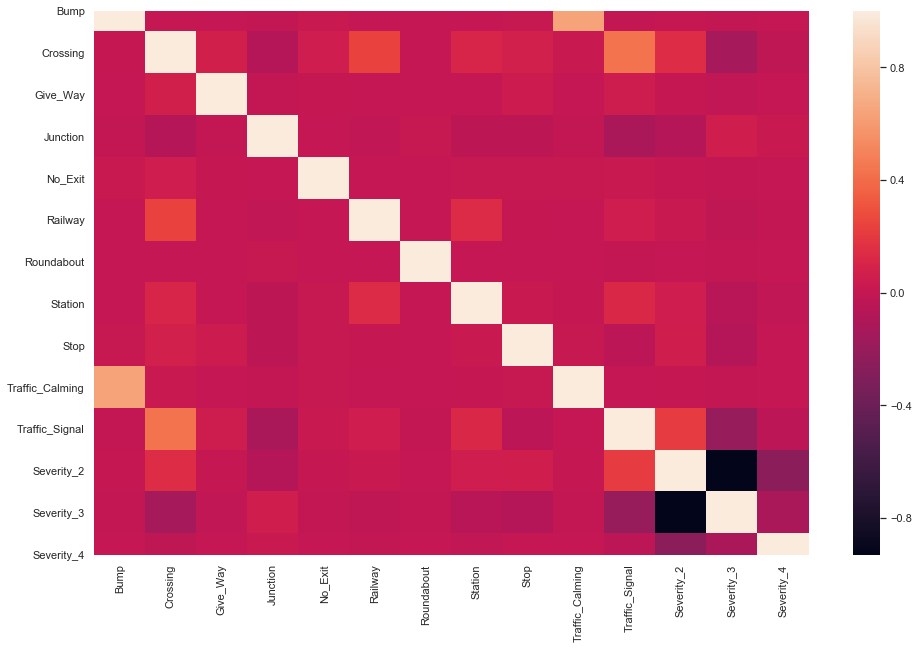

In [53]:
sns.heatmap(df_cor)

These are the columns that effect severity of accident crossing = 2 junction = 3 station = 2 stop = 2 traffic signal = 2

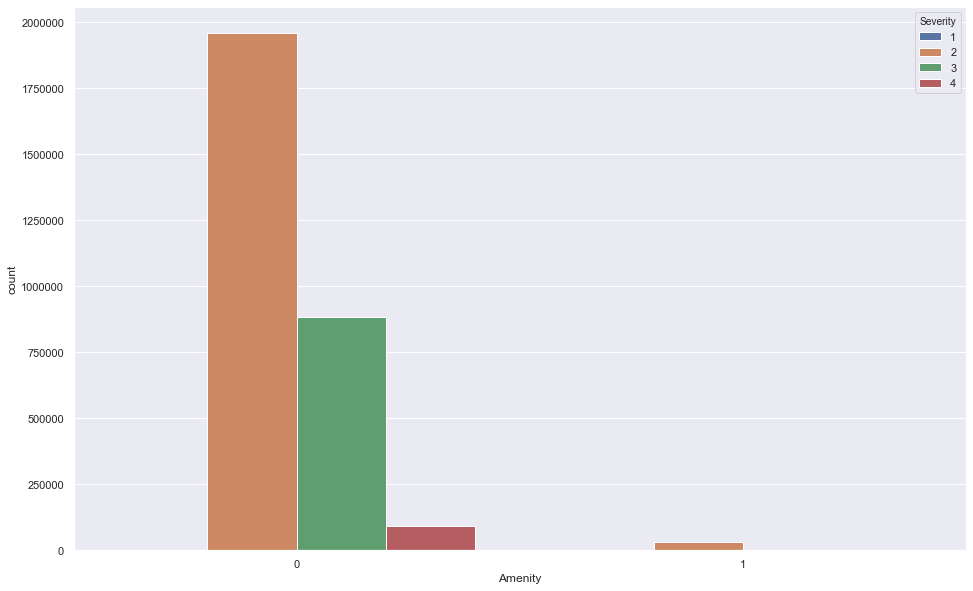

In [54]:
sns.countplot(x = 'Amenity', hue = 'Severity', data = df1) #no amenity present near severe accidents

In [60]:
((df1.Severity == 3) & (df1.Amenity == True)).sum()
((df1.Severity == 3) & (df1.Amenity == False)).sum() #0.2% 

2424

885196

In [61]:
((df1.Severity == 4) & (df1.Amenity == True)).sum()
((df1.Severity == 4) & (df1.Amenity == False)).sum() #0.9%

853

91484

In [37]:
df1.replace({ False : 0, True: 1}, inplace = True)
df1['Infra_Effect'] = df1.Crossing + df1.Junction + df1.Station + df1.Stop + df1.Traffic_Signal
df1.Infra_Effect.value_counts()

0    2134526
1     648077
2     177425
3      14162
4        145
Name: Infra_Effect, dtype: int64

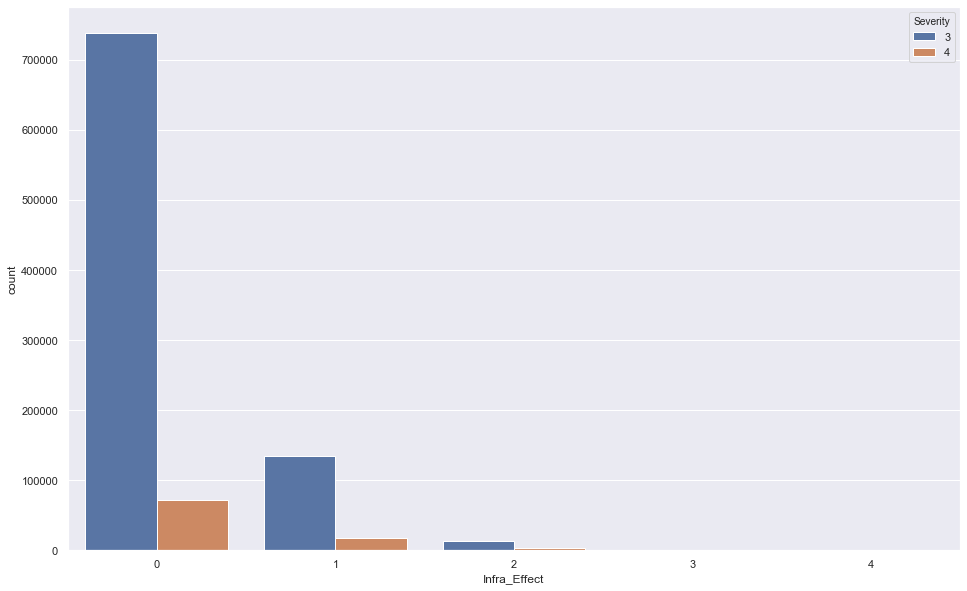

In [36]:
sns.countplot(x = 'Infra_Effect', hue = 'Severity', data = df1[(df1.Severity > 2)])

In [43]:
severity_infra = df1.groupby('Severity')['Crossing', 'Junction', 'Station',\
                             'Stop', 'Traffic_Signal'].agg(['sum'])
severity_infra.rename(columns = {'sum':''}, inplace = True)

Text(0.5, 0, 'Severity')

Text(0, 0.5, 'Count')

Text(0.5, 0.98, 'Relation between Infrastructure and Severity')

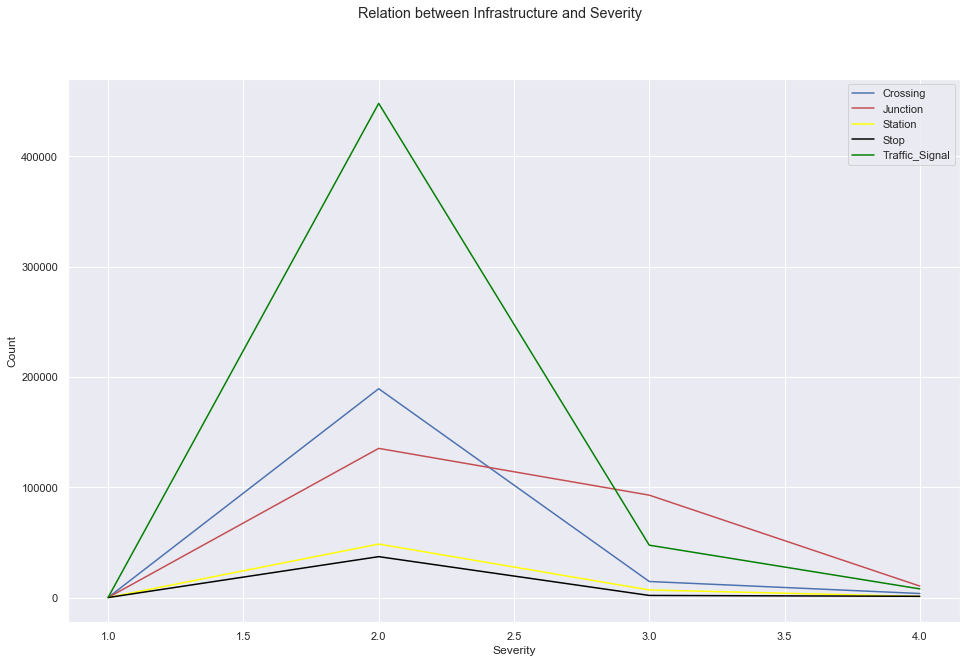

In [44]:
fig = plt.figure()
plt.plot(severity_infra.Crossing,'b')  
plt.plot(severity_infra.Junction,'r') 
plt.plot(severity_infra.Station,'yellow') 
plt.plot(severity_infra.Stop,'black') 
plt.plot(severity_infra.Traffic_Signal,'green') 
plt.legend(['Crossing','Junction','Station','Stop','Traffic_Signal'])
plt.xlabel('Severity')
plt.ylabel('Count')
fig.suptitle('Relation between Infrastructure and Severity')
plt.show()

## Factors affecting accidents - Weather

In [45]:
df1.Weather_Condition.isna().sum()

65932

In [46]:
df3 = df1.copy()

In [47]:
df3.Weather_Condition.fillna('Clear', inplace = True)

In [49]:
df3.Weather_Condition.isna().sum()

0

Top 12 weather conditions for accidents of each severity.

In [50]:
df3.groupby(['Weather_Condition','Severity']).Severity.size().nlargest(12)

Weather_Condition  Severity
Clear              2           576719
Mostly Cloudy      2           272307
Clear              3           267595
Fair               2           253238
Overcast           2           248636
Partly Cloudy      2           199668
Scattered Clouds   2           132613
Mostly Cloudy      3           128741
Overcast           3           119881
Light Rain         2            90480
Partly Cloudy      3            88409
Cloudy             2            83966
Name: Severity, dtype: int64

In [27]:
sns.set(rc={'figure.figsize':(16,10)})

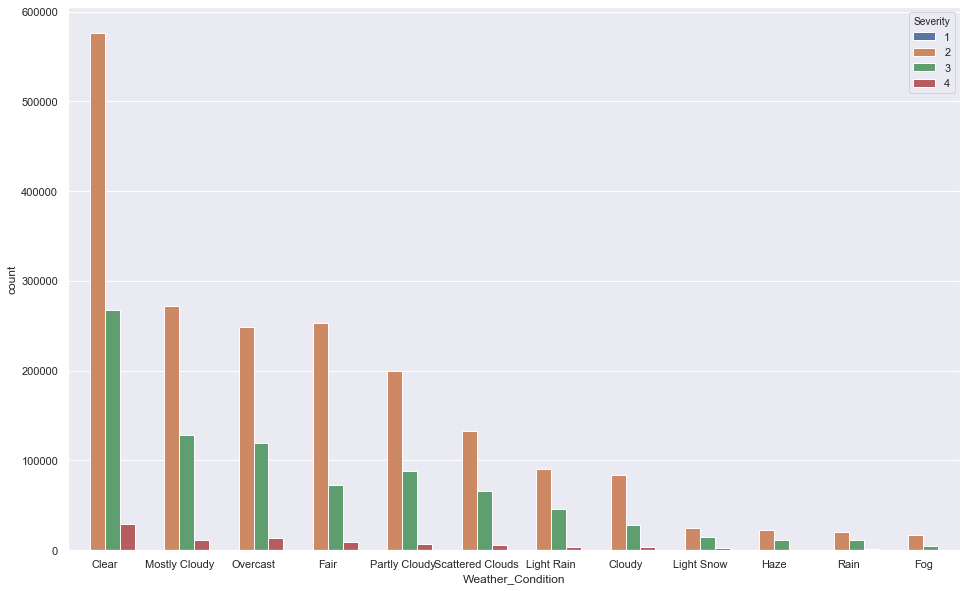

In [68]:
sns.countplot(x = 'Weather_Condition', hue = 'Severity', data = df3, \
              order = pd.value_counts(df3['Weather_Condition']).iloc[:12].index)

<b>Interesting finding: Across all levels of severity, most accidents happen under clear, cloudy, fair or similar weather conditions. These conditions are considered benign compared to rain and snow, Perhaps they are the most frequent conditions.</b>

### Accident Severity under Fog

In [69]:
df_fog = df3[df3.Weather_Condition == 'Fog'].groupby('Severity').size().nlargest(4).reset_index()

In [70]:
df_fog

,Severity,0
0,2,16611
1,3,4767
2,4,754
3,1,6


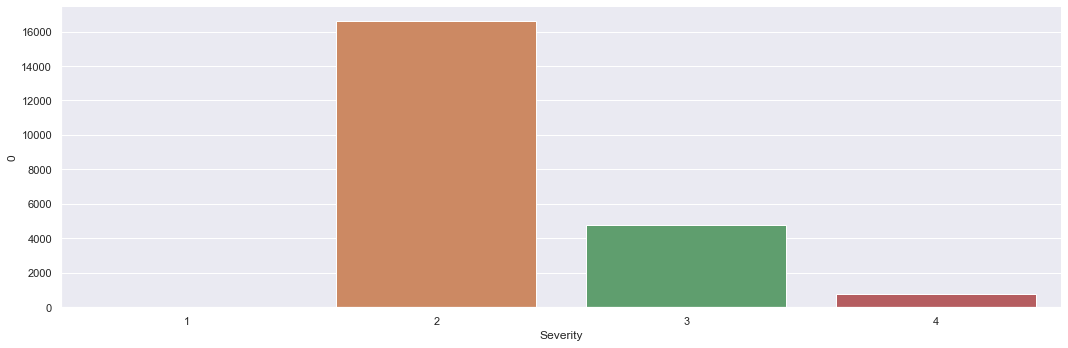

In [71]:
sns.catplot(x = 'Severity', y = 0 , data = df_fog, aspect = 3, kind = 'bar')

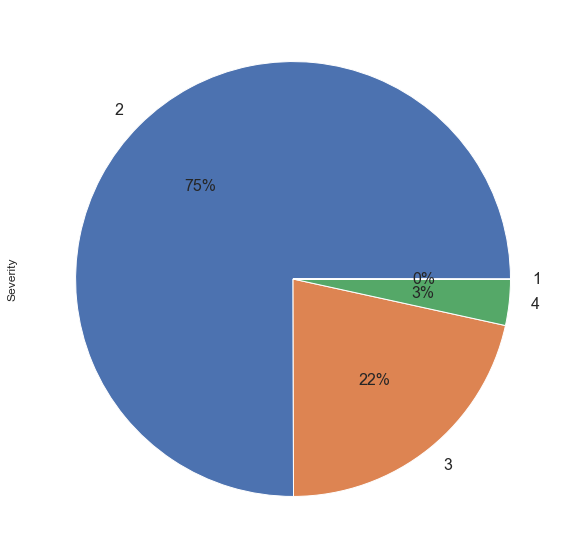

In [72]:
df3[df3.Weather_Condition == 'Fog']['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

### Accident Severity under Rain

In [73]:
df_rain = df3[df3.Weather_Condition == 'Rain'].groupby('Severity').size().nlargest(4).reset_index()

In [74]:
df_rain

,Severity,0
0,2,20185
1,3,11770
2,4,860
3,1,11


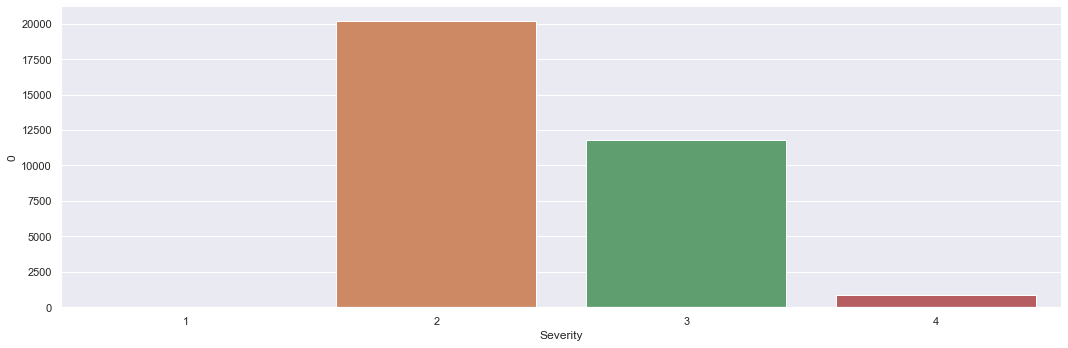

In [75]:
sns.catplot(x = 'Severity', y = 0 , data = df_rain, aspect = 3, kind = 'bar')

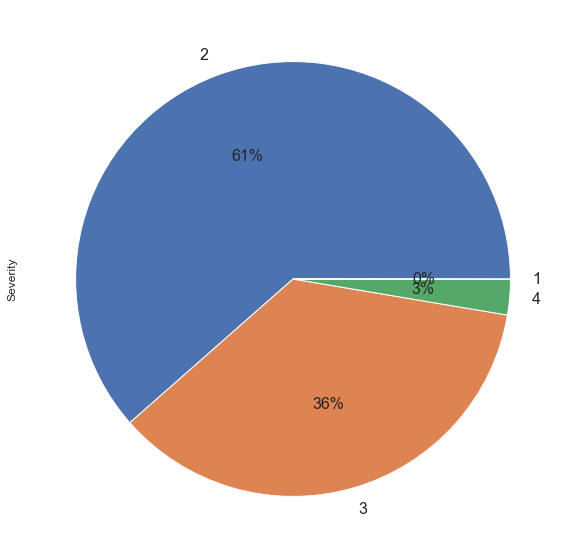

In [76]:
df3[df3.Weather_Condition == 'Rain']['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

### Accident Severity under Heavy Rain

In [77]:
df_hrain = df3[df3.Weather_Condition == 'Heavy Rain'].groupby('Severity').size().nlargest(4).reset_index()

In [78]:
df_hrain

,Severity,0
0,2,7222
1,3,4557
2,4,281
3,1,4


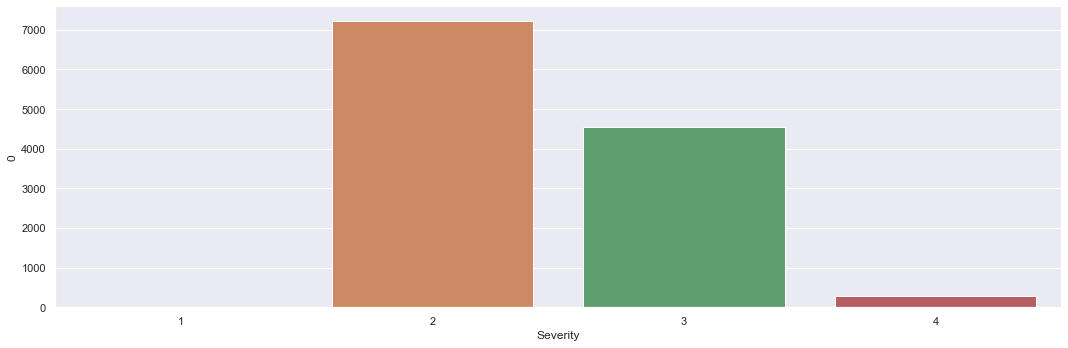

In [79]:
sns.catplot(x = 'Severity', y = 0 , data = df_hrain, aspect = 3, kind = 'bar')

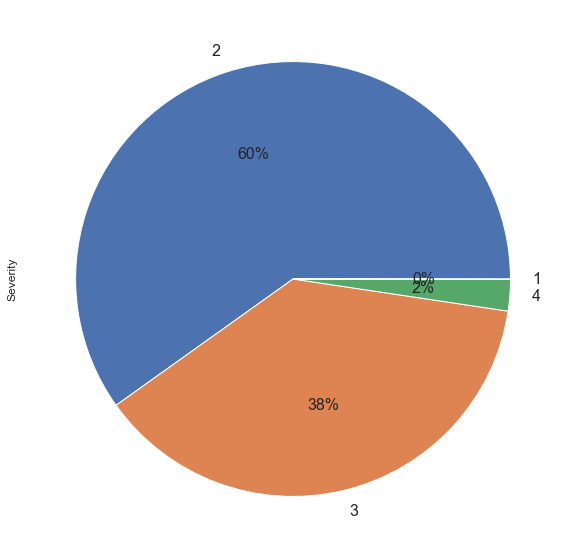

In [80]:
df3[df3.Weather_Condition == 'Heavy Rain']['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

### Accident Severity under Snow

In [81]:
df_snow = df3[df3.Weather_Condition == 'Snow'].groupby('Severity').size().nlargest(4).reset_index()
df_snow

,Severity,0
0,2,2816
1,3,1627
2,4,351
3,1,2


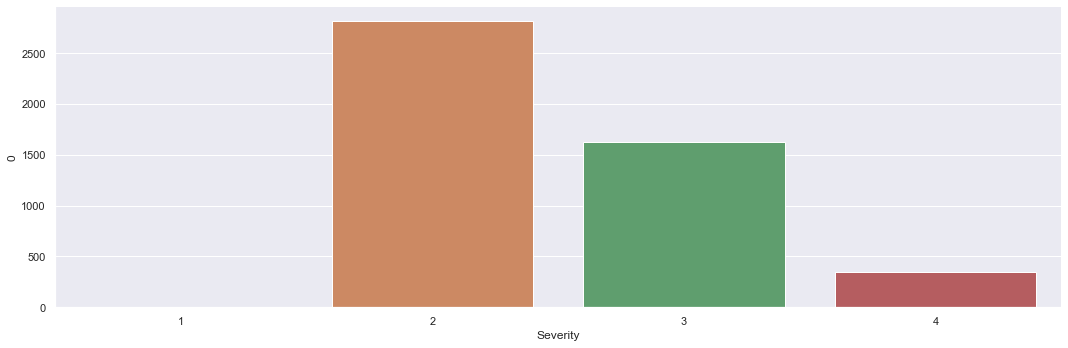

In [82]:
sns.catplot(x = 'Severity', y = 0 , data = df_snow, aspect = 3, kind = 'bar')

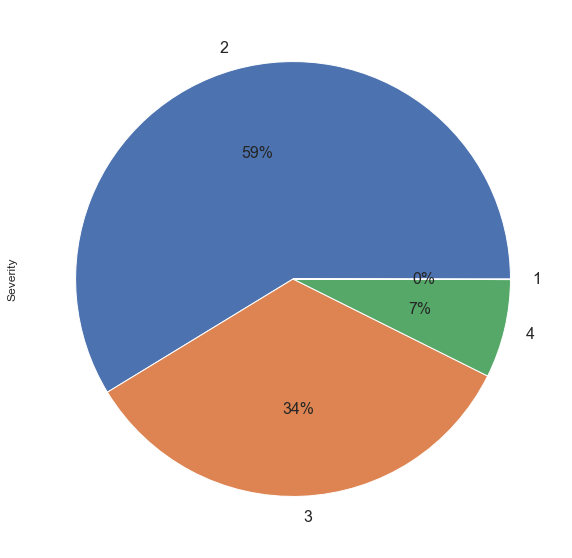

In [83]:
df3[df3.Weather_Condition == 'Snow']['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

<b>Conclusion : </b>The proportion of level 3 and 4 accidents increases as weather changes from fog (25%) to light rain (36%) to rain (39%) to heavy rain (40%) to snow (41%).

#### Data Cleaning of factors affecting Weather.

In [105]:
df3['Pressure(in)'].isna().sum()
df3['Humidity(%)'].isna().sum()
df3['Visibility(mi)'].isna().sum()
df3['Temperature(F)'].isna().sum()
df3['Wind_Chill(F)'].isna().sum()
df3['Precipitation(in)'].isna().sum()
df3['Wind_Speed(mph)'].isna().sum()

0

0

65691

0

0

0

440840

Taking the median of each factor and replacing it with 'NaN'

In [106]:
pressure_median = df3['Pressure(in)'].median()
humidity_median = df3['Humidity(%)'].median()
visibility_median = df3['Visibility(mi)'].median()
temp_median = df3['Temperature(F)'].median()
windchill_median = df3['Wind_Chill(F)'].median()
preci_median = df3['Precipitation(in)'].median()
windspeed_median = df3['Wind_Speed(mph)'].median()

In [107]:
df3['Pressure(in)'].fillna(pressure_median, inplace = True)
df3['Humidity(%)'].fillna(humidity_median, inplace = True)
df3['Visibility(mi)'].fillna(visibility_median, inplace = True)
df3['Temperature(F)'].fillna(temp_median, inplace = True)
df3['Wind_Chill(F)'].fillna(windchill_median, inplace = True)
df3['Precipitation(in)'].fillna(preci_median, inplace = True)
df3['Wind_Speed(mph)'].fillna(windspeed_median, inplace = True)

In [108]:
df3.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street_No', 'Street_Name', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Timezone', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Duration'],
      dtype='object')

In [121]:
df4 = df3.copy()

Dropping the columns which will not be of use in this analysis.

In [122]:
df4.drop(columns = ['Start_Time', 'End_Time','Start_Lat','Start_Lng','Description',\
                    'Street_No','Street_Name','Side','City','County','State','Zipcode','Timezone','Amenity',\
                    'Bump','Crossing','Give_Way','Junction','No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', \
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset','Wind_Direction','Weather_Condition','Duration'], inplace = True)

In [123]:
df4.columns

Index(['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

Creating column 'Severity1/2' for the records who have Severity as '1' or '2' as they are low Severity accidents.

In [124]:
df4['Severity1/2'] = ((df4.Severity == 1) | (df4.Severity == 2)) * 1

Creating column 'Severity3/4' for the records who have Severity as '3' or '4' as they are High Severity accidents.

In [125]:
df4['Severity3/4'] = ((df3.Severity == 3) | (df3.Severity == 4)) * 1

In [126]:
df4.drop(columns = 'Severity', inplace = True)

In [127]:
df4.head()

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Severity1/2,Severity3/4
ID,,,,,,,,,,
A-1,0.01,36.9,54.0,91.0,29.68,10.0,7.0,0.02,0,1
A-2,0.01,37.9,54.0,100.0,29.65,10.0,7.0,0.00,1,0
A-3,0.01,36.0,33.3,100.0,29.67,10.0,3.5,0.00,1,0
A-4,0.01,35.1,31.0,96.0,29.64,9.0,4.6,0.00,0,1
A-5,0.01,36.0,33.3,89.0,29.65,6.0,3.5,0.00,1,0


Using KMeans to find 3 clusters.

In [116]:
from sklearn.cluster import KMeans

In [128]:
clu = KMeans(n_clusters = 3, random_state = 0)
clu.fit(df4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [129]:
df5 = df4.copy()

In [130]:
df5['cluster'] = clu.labels_

In [131]:
df5.groupby('cluster').mean()

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Severity1/2,Severity3/4
cluster,,,,,,,,,,
0,0.241950,74.419936,60.175548,42.292926,29.749003,10.060453,8.699177,0.001217,0.684589,0.315411
1,0.259999,64.260690,56.493306,80.801633,29.890115,8.732034,7.328069,0.010675,0.665026,0.334974
2,0.442018,32.782112,29.078064,72.815828,29.863567,8.482952,8.919402,0.007712,0.656031,0.343969


By this result we can see that highest number of high severity accidents occur when 
1. Temperature is low.
2. Temperature of wind chill is low.
3. Visibility is lowest.
4. Wind Speed is highest.

Let's verify this with Seaborn.

In [133]:
df6 = df5.copy()

In [135]:
df6['binned_temp'] = pd.cut(df5['Temperature(F)'], bins = 5)

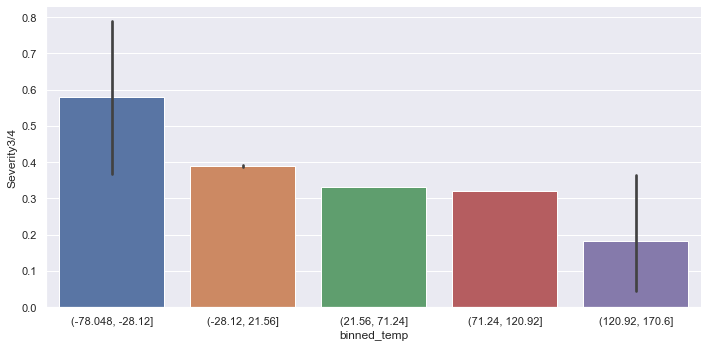

In [136]:
sns.catplot(x='binned_temp', y='Severity3/4', data = df6, aspect = 2, kind = 'bar')

In [137]:
df3['binned_temp'] = pd.cut(df3['Temperature(F)'], bins = 5)